In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

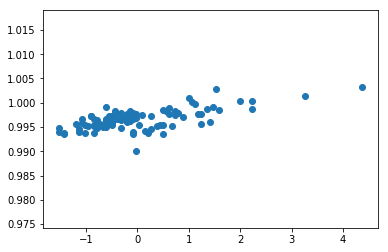

(99, 1) (99, 1)


In [3]:
x = pd.read_csv("./data/linearX.csv")
y = pd.read_csv("./data/linearY.csv")
x = x.values
y = y.values
a = x
b = y

# DATA PREPROCESSING - NORMALISING

x = (x - x.mean())/x.std()
plt.scatter(x,y)
plt.show()

print(x.shape,y.shape)

[0.99660456 0.0013579 ]


[]

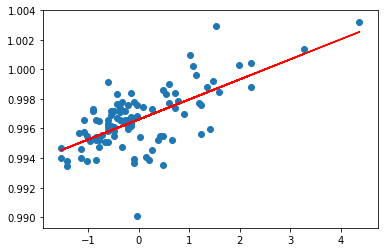

In [3]:
# considering theta as an array with two elements, particularly theta_not and theta_one, theta = np.array([theta_not, theta_one])
# total_sum[0] = total_sum_theta_not, total_sum[1] = total_sum_theta_one 
# instead of doing total_sum_theta_not = 0 and then finding total sum of the derivative and then putting it as total_sum[0]
# simply performed operations on total_Sum[0], simillarly for total_sum[1]
# starting with a random value of theta_not and theta_not(i.e theta array) in this case 0,o in update function
# grad will be an array containing two elements returned from derivative function(total_sum array there)

def hypothesis(theta, x):
    y = theta[0] + theta[1]*x
    return y

def derivative(x, y, theta):
    total_sum = np.array([0.0,0.0])
    m = x.shape[0]
    for i in range(m):
        total_sum[0] = total_sum[0] + (hypothesis(theta, x[i]) - y[i])
        total_sum[1] = total_sum[1] + ((hypothesis(theta, x[i]) - y[i])*x[i])
    #print(total_sum)
    return total_sum

def update(x, y, learning_rate, max_iterations):
    theta = np.array([0.0,0.0])
    combined_error = []
    for i in range(max_iterations):
        err = error(x, y, theta)
        grad = derivative(x, y, theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        combined_error.append(err)
    return theta, combined_error

def error(x, y, theta):
    total_error = 0
    m = x.shape[0]
    for i in range(m):
        total_error = total_error + ((y[i] - hypothesis(theta, x[i]))**2)
    return 0.5*total_error

theta, combined_error = update(x, y, learning_rate = 0.001, max_iterations = 100)
print(theta)

y_hypothesis = hypothesis(theta, x)
plt.plot(x, y_hypothesis, color = "red")
plt.scatter(x,y)
plt.plot()
        

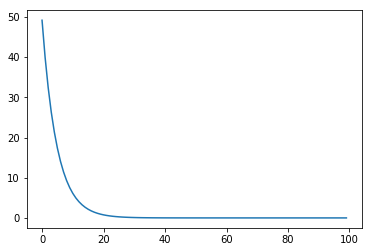

In [4]:
# the error keeps decreasing as we update both theta_not and theta_not and as we reach the convergence point(where dy/dx = 0),
# there error becomes almost constant as increasing number of iterations doesn't have any significant amount of change as
# we have already reached pretty much close to the bottom of the error curve(the bowl shaped curve)

plt.plot(combined_error)
plt.show()

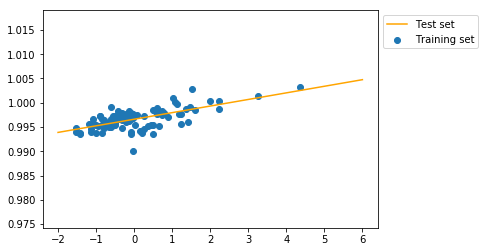

In [5]:
# Plotting line for testing data

# linspace generates 10 points between -2 and 6 that are equally spaced from each other
xtest = np.linspace(-2, 6, 10)
ytest_predicted = hypothesis(theta, xtest)
plt.scatter(x, y, label = "Training set")
plt.plot(xtest, ytest_predicted, color = "orange", label = "Test set")
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

## sklearn library for Linear Regression

In [6]:
# Here not writing code from scratch and using the sklearn library to find the values of theta_not and theta_one,
# sklearn offers a LinearRegression classes that can work with n dimensions, n number of parameters

from sklearn.linear_model import LinearRegression

# Training Linear regression model

# Creating a linear regression object, by default normalization is false, to norm set it to true
lr = LinearRegression(normalize = True)
print(lr)

# Training is done using fit method and supplying it the data. Algorithm learns the values of parameters
lr.fit(a,b)

# printing the parameters theta_not and theta_one
print(lr.coef_) # this refers to the remaining parameters other than theta_not i.e theta_one
print(lr.intercept_) # it refers to theta_not

# now these coef_ and intercept_ will be given to hypothesis to get the predicted y values


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
[[0.00078556]]
[0.9903092]


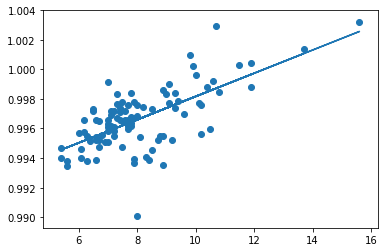

In [29]:
arr = np.array([lr.intercept_, lr.coef_])
b_predicted = hypothesis(arr, a)
plt.plot(a, b_predicted)
plt.scatter(a,b)
plt.show()

In [38]:
print(lr.score(a,b))

0.4381850455792001
